# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/charlesgreen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


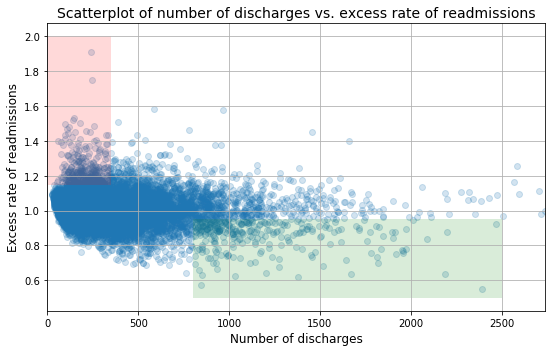

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<div class="span5 alert alert-warning">
<h5>Approach</h5>

<p>The approach to this analysis will involve division of the Preliminary Report into each of its sections.  Code blocks below will be used to check initial impressions from the report and to offer analysis.</p>

In [5]:
# Information on data for orientation to dataset
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


<div class="span5 alert alert-warning">

<p>Lines plotted are not intended to suggest any statistical significance or conclusions regarding the data.  While some data from the dataset is used for plotting, the purpose is merely for illustration of the presented response.</p>

In [6]:
# Function to plot conical shape seen in most dense portion of data
def linepoints(yint1, yint2, xk1, yk1, xk2, yk2):
    x1 = [0]
    y1 = [yint1]
    x2 = [0]
    y2 = [yint2]
    m1 = (yk1 - yint1) / (xk1 - 0)
    m2 = (yk2 - yint2) / (xk2 - 0)
    xmax = (yint2 - yint1) / (m1 - m2)
    x1.append(xmax)
    x2.append(xmax)
    y1.append(xmax*m1+yint1)
    y2.append(xmax*m2+yint2)
    
    return x1,y1,x2,y2

# Regression plot to determine and visually represent the claimed trend as demonstrated by the data plot
def lin_reg(x,y):
    """Collects x, y data returns slope, intercept and theoretical x,y plottable values"""
    
    m,b = np.polyfit(x,y,1)
    plot_x = np.array([(np.min(x)),(np.max(x)+(np.min(x)))])
    plot_y = m * plot_x + b

    return m,b,plot_x, plot_y

In [7]:
# Find plot points
x1,y1,x2,y2 = linepoints(1.295,0.75,x[-29],y[-29],x[-10],y[-10])
_,_,x3,y3 = lin_reg(x,y)

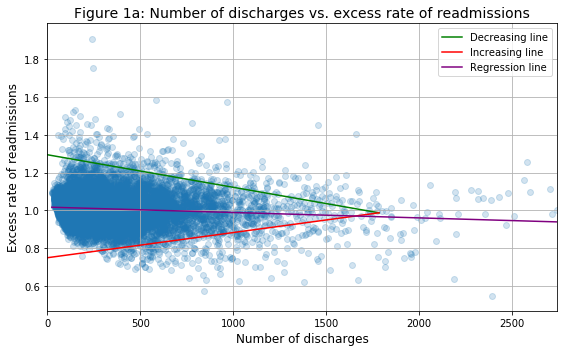

In [8]:
# Plot Figure 1a:  Notice x & y have 3 non null values removed.  They will be included in Figure 1b
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# Removing Fills
#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

# Plot of lines outlining cone shape of most dense portion of data
plt.plot(x1,y1, color='green', label='Decreasing line')
plt.plot(x2,y2, color='red', label='Increasing line')
plt.plot(x3,y3, color='purple', label='Regression line')
plt.legend()

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 1a: Number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

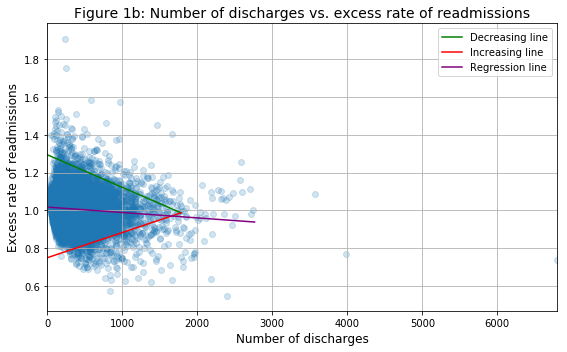

In [9]:
# Plot Figure 1b including extreme points excluded from original plot.
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# Removing Fills
#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

# Plot of lines outlining cone shape of most dense portion of data
plt.plot(x1,y1, color='green', label='Decreasing line')
plt.plot(x2,y2, color='red', label='Increasing line')
plt.plot(x3,y3, color='purple', label='Regression line')
plt.legend()

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 1b: Number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

<div class="span5 alert alert-success">
## Preliminary Report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

<font color='blue'>
<h5>Initial Response (observations):</h5>
<p>This observation does appear reasonable.  It suggests the data are linear with a negative slope.  The plot appears somewhat conical, tending to taper and diminish in overall density as discharges increase. Given the scatter of points widens and becomes less dense as discharges increase on the plot, fitting a regression line may appear to have an overall negative slope (Figure 1a).</p>
<p>Of note, however, is that the conical description of the plot.  In other words, while the top portion demonstrates a decrease in readmissions as discharges increase, the bottom portion of the plot shows an observable increase in rate of readmissions as discharges increase (Figure 1a).</p>
<p>Additionally, while not observable in the plot, the plot is unable to account for approximately 16% of overall discharges and readmissions.  Unfortunately, the data is incomplete or unavailable.  Furthermore, the entirety of the available data is not shown in the plot.  Three extreme values were removed from the plot.  Their removal is appropriate, however, because the leverage of the exreme values, while supporting the initial observation, can have a skewing impact and detract from the overal visualization of the data.</p>
<p>Absent is discussion of how outliers are identified and/or treated.  The shaded areas of the plot seem to emphasize potential outlier observations.  Given the definition of excess readmission, the shaded areas appear arbitrary.  That said, the discussion of trends could be unsubstantiated and misleading.  Otherwise, based on the plot, noting the combination of point density and associated shape, a potential tendency toward the mean may be observed.</p>
</font>

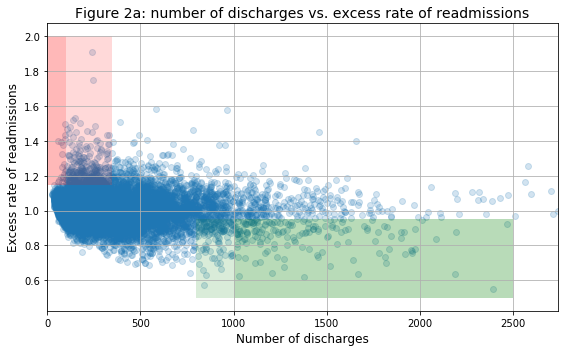

In [10]:
# Plot Figure 2a to overlay shaded region discussed in statistics section.
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,100], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 2a: number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

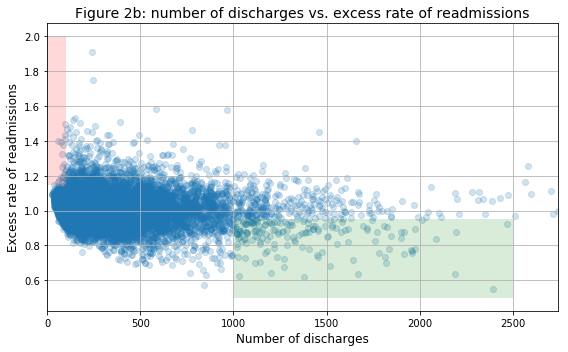

In [11]:
# Plot Figure 2b removing originally shaded regions
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,100], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 2b: number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [12]:
# Split data into appropriate categories per sections A & B
chrdf = clean_hospital_read_df[81:]
df800 = chrdf[chrdf['Number of Discharges'] > 800]
df350 = chrdf[chrdf['Number of Discharges'] < 350]
dfbet = chrdf[(chrdf['Number of Discharges'] > 350) & (chrdf['Number of Discharges'] < 800)]

df8ct = df800[df800['Excess Readmission Ratio'] > 1.0]
df3ct = df350[df350['Excess Readmission Ratio'] > 1.0]
print('Mean : ', np.mean(df800['Excess Readmission Ratio']), '     percent > 1.0:',(len(df8ct['Excess Readmission Ratio']) / len(df800['Excess Readmission Ratio']))*100)
print('Mean : ', np.mean(df350['Excess Readmission Ratio']), '     percent > 1.0:',(len(df3ct['Excess Readmission Ratio']) / len(df350['Excess Readmission Ratio']))*100)

Mean :  0.9854186874304783      percent > 1.0: 47.27474972191324
Mean :  1.0133321663332373      percent > 1.0: 53.31523292369248


<div class="span5 alert alert-success">
**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

<font color='blue'>
<h5>Initial Response (statistics):</h5>
<p>While, at face value, the reported statistics are accurate, they may be misleading for the following reasons:</p>
<ol>
<li>The reported statistics above account for less than 15% of the observations.</li>
<ul>
<li>Digging deeper with the above summary statistics per group demonstrates that the reported statistics are likely to be extremes within the data.</li>
</ul>
<li>The metrics used for reported statistics are inconsistent with both preliminary observations and conclusions.</li>
<ul>
<li>Observations regarding the shading of the plot were briefly discussed earlier.  Looking more closely at the shaded area (Figure 2a), the shaded areas have darker regions identifying, in part, the metrics reported in the statistics.  Replotting and shading to reflect the reported statistics (Figure 2b) suggests further exploration is necessary.</li>
<li> While computed statistics reflecting the metrics used for the plot's shaded regions indicate higher discharge rates have lower excess readmission rates at face value, the difference between the two samplings is much less extreme.  Given different sampling sizes, the statistical significance will need further testing.  See the following:
<ol>
<li> In hospitals/facilities with number of discharges < 350, mean excess readmission rate is 1.012 and 52% have excess readmission rate greater than 1</li>
<li>In hospital/facilities with number of discharges > 800, mean excess readmission rate is 0.985 and 47% hav excess readmission rate greater than 1</li>
</ol>
<font>

<div class="span5 alert alert-warning">
<p>The following code blocks will set up for and execute hypothesis testing for different divisions of the data.  The indicated regions in sections A and B will be tested.  Each respective hypothesis/null-hypothesis will be indicated.  The significance threshhold for each test will be set at $\alpha$ = 0.01

In [13]:
# Two sample z test formula. 
def ztst_2samp(data1, data2, h_0):
    """Performs a 2 sample z-test, returning z-score and p-value"""
    
    d1m, d1n = np.mean(data1), len(data1)
    d2m, d2n = np.mean(data2), len(data2)
    mean = (np.sum(data1) + np.sum(data2)) / (len(data1) + len(data2))
    
    top = d1m - d2m - h_0 
    bottom = mean * (1 - mean) * ((1/d1n) + (1/d2n))
    
    z = top / np.sqrt(abs(bottom))
    
    if d1m >= d2m:
        p = stats.norm.cdf(-z)*2
    
    else:
        p = stats.norm.cdf(z)*2
    
    return z,p

# Define functions for test stat data and margin of error
def z_merci2(data1, data2, z_conf_int):
    full = np.concatenate((data1, data2))
    mean = np.mean(full)
    diff = np.mean(data1) - np.mean(data2)
    moe = z_conf_int * np.sqrt(abs(mean * (1-mean) * ((1/len(data1)+(1/len(data2))))))
    ci = (mean - diff) + np.array([-1, 1]) * moe
    
    return moe, ci, diff

# Function to assist in evaluation of practical significance
def diff_of_effect(data, control_data):
    """Determines difference of effect to evaluate practical significance"""
    if np.std(data) == np.std(control_data):
        doe = (abs(np.mean(control_data) - np.mean(data))) / np.std(control_data)
    else:
        plsd = np.sqrt(((np.std(data)**2)*(len(data)-1)+(np.std(control_data)**2)*(len(control_data)-1))/(len(data)+len(control_data) - 2))
        doe = (abs(np.mean(control_data) - np.mean(data))) / plsd
    
    n = np.percentile(data,50)
    a =  int(np.round((1-(control_data < n).sum() / len(control_data))* 100,0))
    b = (control_data < n).sum()
    c = len(control_data)
    
    return doe,a,b,c

# Import additional library for statistical tests
import scipy.stats as stats

In [14]:
# Continue split data into appropriate categories per sections A & B
df100 = chrdf[chrdf['Number of Discharges'] < 100]
df1000 = chrdf[chrdf['Number of Discharges'] > 1000]

# Create arrays for data to be tested
radr100 = df100['Excess Readmission Ratio']
radr350 = df350['Excess Readmission Ratio']
radr800 = df800['Excess Readmission Ratio']
radr1000 = df1000['Excess Readmission Ratio']
radrchrdf = chrdf['Excess Readmission Ratio']
radrbet = dfbet['Excess Readmission Ratio']

<div class="span5 alert alert-warning">
<p>The first hypothesis test will be between the samples represented in Section B: Statistics of the preliminary report.  At face value, the 0.045 difference in means of the samples seems small enough that, given Central Limit Theorem, may be explained as simply two samplings of the same distribution.  Therefore, the following hypotesis test will allow for determining if the samples are similarly distributed; thus demonstrating the difference is not statistically significant.</p>

$$H_0: \bar{x}_{f<100} = \bar{x}_{f>1000}$$
$$H_A: \bar{x}_{f<100} \ne \bar{x}_{f>1000}$$



In [15]:
z1,p1 = ztst_2samp(radr100, radr1000, 0)
moe1,ci1,_ = z_merci2(radr100,radr1000,2.576) 

print('--- z-test Stats ---')
print('p-value: ',p1)
print('z-score:',z1)
print('99% confidence interval: ', ci1)
print('margin of error : ', moe1)
print('f < 100 sample size:', len(radr100))
print('f > 1000 sample size:', len(radr1000))

--- z-test Stats ---
p-value:  1.6829270245e-15
z-score: 7.96272390229
99% confidence interval:  [ 0.95159103  0.98024274]
margin of error :  0.0143258546333
f < 100 sample size: 1188
f > 1000 sample size: 463


<div class="span5 alert alert-warning">
<p>Given the extreme of the z-score and a p-value of practically zero, evidence suggest the null hypothesis that both samples are similarly distributed ought to be rejected.  While the hypotesis test does demonstrate statistical significance between the two reported samples, previously mentioned items of note will require exploration:</p>
<ul>
<li>Metrics of the shaded area of the plot </li>
<li>Combined, the samples are less than 15% of all observations</li>
</ul>

<p>The next hypothesis test will be between the samples represented in section A: Initial observations based on the plot above of the preliminary report.  As before, the face value difference of means, at 0.028, and the given the combined number of samples at approximately 68% of observations, seem likely to provide a better representation of the overall data.  Therefore, the following hypotesis test will allow for determining if the samples are similarly distributed.</p>

$$H_0: \bar{x}_{f<350} = \bar{x}_{f>800}$$
$$H_A: \bar{x}_{f<350} \ne \bar{x}_{f>800}$$



In [16]:
z2,p2 = ztst_2samp(radr350, radr800, 0)
moe2,ci2,_ = z_merci2(radr350,radr800,2.576) 

print('--- z-test Stats ---')
print('p-value: ',p2)
print('z-score:',z2)
print('99% confidence interval: ', ci2)
print('margin of error : ', moe2)
print('f < 350 sample size:', len(radr350))
print('f > 800 sample size:', len(radr800))

--- z-test Stats ---
p-value:  7.30661484509e-15
z-score: 7.77905871243
99% confidence interval:  [ 0.97299758  0.99148442]
margin of error :  0.00924342189867
f < 350 sample size: 6998
f > 800 sample size: 899


<div class="span5 alert alert-warning">
<p>Given the extreme of the z-score and a p-value of practically zero, evidence suggest the null hypothesis that both samples are similarly distributed ought to be rejected.  This particular test establishes a couple items of note:</p>
<ul>
<li>The shaded regions are statistically significantly different.</li>
<li>The capacity metric in section D: Regulatory Policy Recommendations might be flawed.</li>
</ul>

<p>The next hypothesis test will be between the sample with discharges $<100$ and the overall data.  To this point, seemingly small difference of means (0.028-0.045) have been shown statistically significant.  This hypothesis test will look at the statistical significance of an even smaller difference of means (0.015).</p>

$$H_0: \bar{x}_{f<100} = \mu$$
$$H_A: \bar{x}_{f<100} \ne \mu$$

In [17]:
z3,p3 = ztst_2samp(radr100, radrchrdf,0)
moe3,ci3,_ = z_merci2(radr100, radrchrdf, 2.576)

print('--- z-test Stats ---')
print('p-value: ',p3)
print('z-score:',z3)
print('99% confidence interval: ', ci3)
print('margin of error : ', moe3)
print('f < 100 sample size:', len(radr100))
print('f < 100 sample mean: ', np.mean(radr100))
print('Population size:', len(radrchrdf))
print('Population mean: ', np.mean(radrchrdf))

--- z-test Stats ---
p-value:  1.71116897467e-07
z-score: 5.22825553725
99% confidence interval:  [ 0.9863577   1.00125181]
margin of error :  0.00744705824223
f < 100 sample size: 1188
f < 100 sample mean:  1.0226183501683506
Population size: 11497
Population mean:  1.0075037835957146


<div class="span5 alert alert-warning">
<p>The extreme of the z-score, although less extreme than previous tests, and a p-value of practically zero, evidence suggest the null hypothesis that both samples are similarly distributed ought to be rejected.  Despite the small difference of means, the sample is found statistically significantly different from the overall data population.</p>

<p>The next hypothesis test will be between the sample with discharges $>1000$ and the overall data.  To this point, seemingly small difference of means (0.015-0.045) have been shown statistically significant.  Given the difference of means, at 0.030, falls within a range of differences that yield statistically significant differences, it would be reasonable to predict that the following null hypothesis may likely be rejected.</p>

$$H_0: \bar{x}_{f>1000} = \mu$$
$$H_A: \bar{x}_{f>1000} \ne \mu$$

In [18]:
z4,p4 = ztst_2samp(radr1000, radrchrdf,0)
moe4,ci4,_ = z_merci2(radr1000, radrchrdf, 2.576)

print('--- z-test Stats ---')
print('p-value: ',p4)
print('z-score:',z4)
print('99% confidence interval: ', ci4)
print('margin of error : ', moe4)
print('f > 1000 sample size:', len(radr1000))
print('f > 1000 sample mean: ', np.mean(radr1000))
print('Population size:', len(radrchrdf))
print('Population mean: ', np.mean(radrchrdf))

--- z-test Stats ---
p-value:  1.55580821859e-14
z-score: -7.68285568603
99% confidence interval:  [ 1.02576305  1.04532289]
margin of error :  0.00977991839087
f > 1000 sample size: 463
f > 1000 sample mean:  0.9783354211663071
Population size: 11497
Population mean:  1.0075037835957146


In [19]:
z5,p5 = ztst_2samp(radrbet, radrchrdf,0)
moe5,ci5,_ = z_merci2(radrbet, radrchrdf,2.576)

print('--- z-test Stats ---')
print('p-value: ',p5)
print('z-score:',z5)
print('99% confidence interval: ', ci5)
print('margin of error : ', moe5)
print('f > 1000 sample size:', len(radrbet))
print('f > 1000 sample mean: ', np.mean(radrbet))
print('Population size:', len(radrchrdf))
print('Population mean: ', np.mean(radrchrdf))

--- z-test Stats ---
p-value:  0.000121272786757
z-score: -3.8435388584
99% confidence interval:  [ 1.00803553  1.01577599]
margin of error :  0.00387023178681
f > 1000 sample size: 3585
f > 1000 sample mean:  1.0017291771269197
Population size: 11497
Population mean:  1.0075037835957146


<div class="span5 alert alert-warning">
<p>The extreme of the z-score and a p-value of practically zero, evidence suggest the null hypothesis that both samples are similarly distributed ought to be rejected.  As expected, the sample is found statistically significantly different from the overall data population.</p>

<p>The hypothesis testing performed on these data demonstrates a potential flaw inherent in statistical significance.  As seen in these tests, if sample sizes are very large, even very small differences can be determined as statistically significant.  This can lead to confusion if, for example, a sample performing on target is can still be found significantly different than the target.</p>

<p>While statistical significance provides important insight, it should not detract from the overall big picture:  the target.  Statistical significance has been established for each category tested, however, now the question of practical significance must be answered.</p>

<p>It should be noted that the assessment practical significance is <b>NOT</b> the path taken when the assessment of statistical significance is undesirable.  In fact, a statistical approach to assess practical significance with a measure of the <i>effect size</i>.  Given the statistical significance demonstrates the distributions are different, accounting for respective variance and standardizing the mean difference establishes a scale of comparison for the data.  Utilizing this effect size scale, the general guideline for interpreting effect size is as follows:</p>
<ul>
<li> 0.2 :  Small effect size</li>
<li> 0.5 :  Medium effect size</li>
<li> 0.8 :  Large effect size</li>
</ul>

In [20]:
# Calculating difference of effect by respective hypothesis test
d1,e1,n1,t1 = diff_of_effect(radr100,radr1000)
d2,e2,n2,t2 = diff_of_effect(radr350,radr800)
d3,e3,n3,t3 = diff_of_effect(radr100,radrchrdf)
d4,e4,n4,t4 = diff_of_effect(radr1000,radrchrdf)

print('For facilities < 100 and > 1000 :')
print('diff of effect : ',np.round(d1,2))
print('The 50th percentile translates to ', str(np.round(e1,0))+'th percentile with',n1,'of',t1,'observations of lower value.')
print()
print('For facilities < 350 and > 800 :')
print('diff of effect : ',np.round(d2,2))
print('The 50th percentile translates to ', str(np.round(e2,0))+'th percentile with',n2,'of',t2,'observations of lower value.')
print()
print('For facilities < 100 and all facilities :')
print('diff of effect : ',np.round(d3,2))
print('The 50th percentile translates to ', str(np.round(e3,0))+'th percentile with',n3,'of',t3,'observations of lower value.')
print()
print('For facilities > 1000 and all facilities :')
print('diff of effect : ',np.round(d4,2))
print('The 50th percentile translates to ', str(np.round(e4,0))+'th percentile with',n4,'of',t4,'observations of lower value.')

For facilities < 100 and > 1000 :
diff of effect :  0.55
The 50th percentile translates to  37th percentile with 292 of 463 observations of lower value.

For facilities < 350 and > 800 :
diff of effect :  0.32
The 50th percentile translates to  44th percentile with 499 of 899 observations of lower value.

For facilities < 100 and all facilities :
diff of effect :  0.17
The 50th percentile translates to  43th percentile with 6567 of 11497 observations of lower value.

For facilities > 1000 and all facilities :
diff of effect :  0.31
The 50th percentile translates to  59th percentile with 4717 of 11497 observations of lower value.


<div class="span5 alert alert-warning">
<p>As noted above, the difference of effect is essentially the translation of the position of a value in a sample to that value's position in another sample.  This is done by standardizing the data and recording the difference, in standard deviations, between means to ascertain similarity.  The larger the difference, the less similar the samples and therefore more evidence supporting a conclusion of agreement between practical and statistical significance.  To aid with visually, the following code will create standardized plots demonstrating the effect size of the associated samples.  See the figures below.</p>

In [21]:
import matplotlib.mlab as mlab

mn100 = np.mean(radr100)
mn1000 = np.mean(radr1000)
mn350 = np.mean(radr350)
mn800 = np.mean(radr800)
mnall = np.mean(radrchrdf)

sd100 = np.std(radr100)
sd1000 = np.std(radr1000)
sd350 = np.std(radr350)
sd800 = np.std(radr800)
sdall = np.std(radrchrdf)

x1000 = np.linspace(mn1000 - 3*sd1000, mn1000 + 3*sd1000, 1000)
x800 = np.linspace(mn800 - 3* sd800, mn800 + 3*sd800, 1000)
xall = np.linspace(mnall - 3* sdall, mnall + 3*sdall, 1000)

p1 = mlab.normpdf(x1000, mn100, sd1000)
p2 = mlab.normpdf(x1000, mn1000, sd1000)
p3 = mlab.normpdf(x800, mn350, sd800)
p4 = mlab.normpdf(x800, mn800, sd800)
p5 = mlab.normpdf(xall, mn100, sdall)
p6 = mlab.normpdf(xall, mnall, sdall)
p7 = mlab.normpdf(xall, mn1000, sdall)
p8 = mlab.normpdf(xall, mnall, sdall)


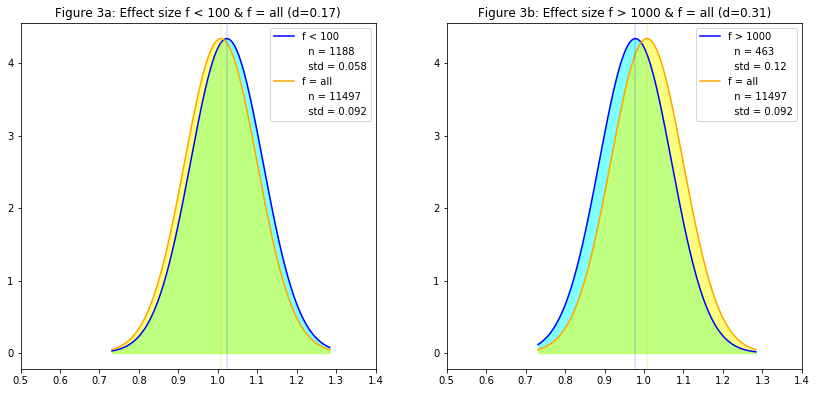

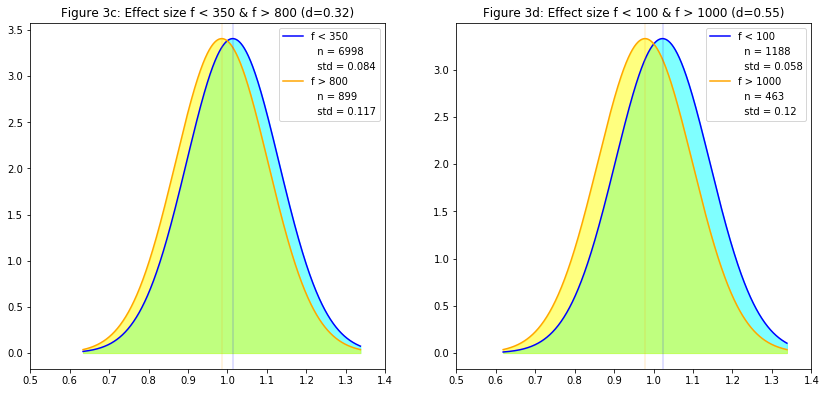

In [22]:
plt.figure(1, figsize=(14,14))
plt.subplot(221)
_ = plt.plot(xall, p5, label='f < 100',color='blue')
_ = plt.plot([],[], label=('  n = ' + str(len(radr100))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr100),3))),alpha=0)
_ = plt.plot(xall, p6, label = 'f = all',color='orange')
_ = plt.plot([],[], label=('  n = ' + str(len(radrchrdf))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radrchrdf),3))),alpha=0)
_ = plt.axvline(x=mn100, color='blue', linewidth=0.25)
_ = plt.axvline(x=mnall, color='orange', linewidth=0.25)
_ = plt.fill_between(xall,p5, color='cyan', alpha=0.5)
_ = plt.fill_between(xall,p6, color='yellow', alpha=0.5)
_ = plt.xlim([0.5,1.4])
plt.title('Figure 3a: Effect size f < 100 & f = all (d=0.17)')
plt.legend()

plt.subplot(222)
_ = plt.plot(xall,p7, label='f > 1000', color='blue')
_ = plt.plot([],[], label=('  n = ' + str(len(radr1000))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr1000),3))),alpha=0)
_ = plt.plot(xall, p8, label = 'f = all', color='orange')
_ = plt.plot([],[], label=('  n = ' + str(len(radrchrdf))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radrchrdf),3))),alpha=0)
_ = plt.axvline(x=mn1000, color='blue', linewidth=0.25)
_ = plt.axvline(x=mnall, color='orange', linewidth=0.25)
_ = plt.fill_between(xall,p7, color='cyan', alpha=0.5)
_ = plt.fill_between(xall,p8, color='yellow', alpha=0.5)
_ = plt.xlim([0.5,1.4])
plt.title('Figure 3b: Effect size f > 1000 & f = all (d=0.31)')
plt.legend()

plt.figure(2, figsize=(14,14))
plt.subplot(221)
_ = plt.plot(x800, p3, label='f < 350', color='blue')
_ = plt.plot([],[], label=('  n = ' + str(len(radr350))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr350),3))),alpha=0)
_ = plt.plot(x800, p4, label = 'f > 800', color='orange')
_ = plt.plot([],[], label=('  n = ' + str(len(radr800))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr800),3))),alpha=0)
_ = plt.axvline(x=mn350, color='blue', linewidth=0.25)
_ = plt.axvline(x=mn800, color='orange', linewidth=0.25)
_ = plt.fill_between(x800,p3, color='cyan', alpha=0.5)
_ = plt.fill_between(x800,p4, color='yellow', alpha=0.5)
_ = plt.xlim([0.5,1.4])
plt.title('Figure 3c: Effect size f < 350 & f > 800 (d=0.32)')
plt.legend()

plt.subplot(222)
_ = plt.plot(x1000, p1, label='f < 100', color='blue')
_ = plt.plot([],[], label=('  n = ' + str(len(radr100))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr100),3))),alpha=0)
_ = plt.plot(x1000, p2, label = 'f > 1000', color='orange')
_ = plt.plot([],[], label=('  n = ' + str(len(radr1000))), alpha=0)
_ = plt.plot([],[], label=('  std = '+ str(np.round(np.std(radr1000),3))),alpha=0)
_ = plt.axvline(x=mn100, color='blue', linewidth=0.25)
_ = plt.axvline(x=mn1000, color='orange', linewidth=0.25)
_ = plt.fill_between(x1000,p1, color='cyan', alpha=0.5)
_ = plt.fill_between(x1000,p2, color='yellow', alpha=0.5)
_ = plt.xlim([0.5,1.4])
plt.title('Figure 3d: Effect size f < 100 & f > 1000 (d=0.55)')
plt.legend()


plt.show()

<div class="span5 alert alert-warning">
**Interpretation**
<p>Caution should be exercised when interpreting practical significance of a small, medium, and/or large effect sizes.  Regarding the plotted visual representations, it should be understood that the plots are standardized by variance.  In other words, the plots demonstrate how two samples, all else being equal, would look if they differ <b><i>only</b></i> by their respective mean.  Having been found statistically significantly different, the plots above allow for the view of the effect even very small differences in mean have.</p>

<p>That said, the plots help visualize the assessment of practical significance.  In the each of the cases above, the differences between the distributions were found to be statistically significant.  Observing the plots, however, the standardized distributions appear reasonably close to each other, albeit off center.  The degree of similarity between the plots helps to determine how useful is treating the samples similarly or differently.  The larger the difference seen the less similar the plots may be considered.  This helps to determine how samples are treated.</p>

**Figure 3a**
<p>The effect size is small enough that the standardized plots are very nearly right on top of each other.  Notice the large difference in sample size and the difference in how the data are spread (standard deviation).  While this difference in sample size likely lends to the finding of samples being statistically significantly different, the differences in standard deviatiation deserve consideration.  The smaller sample, more likely to be affected by outliers, is actually less spread out than the larger sample.</p>
<p>Despite these differences, especially in sample size, the effect size is small.  Considering these factors have only a small effect, interpreting the small effect size suggests the difference between the two is not practically significant; therefore treating the samples differently may not be useful.</p>

**Figure 3b and Figure 3c**
<p>These examples demonstrate a small to medium effect size.  As seen, individual shaded regions (yellow and blue) are larger than the previous figure, illustrating how the increasing effect size impacts how much the distributions have in common (green shaded region).  Again, taking notice of the differences in sample size and standard deviation the factors influencing the effect size are apparent.  Still, given the small difference in mean, and considering the large difference in sample sizes and respective differences in standard deviation, the effect may be deemed small enough to treat the distributions similarly.</p>

**Figure 3d**
<p>This example shows a medium effect size. In this case, the differences in sample size are not as large, however the control sample has practically double the standard deviation.  As the smaller sample, the mean is affected more by outlier data accounting for its spread and, likely, for the difference in mean.  Given the sample distributions are beginning to show more separation, it might be tempting to consider the samples practically significant.  Still, the standardized plot shows both samples with a large degree of commonality.</p>
<p>Additionally, given the same control sample (orange/yellow plot), the plots of Figure 3a and Figure 3b demonstrate effects in opposite directions.  This may support the assertion that metrics reported in section B: Statistics are more representative of extremes than the overall data.  As extremes samplings of a population, the reason for the effect size becomes clear.  Considering the samples as representative of extremes in the population may offer another perspective of the medium effect size:  The effect size may suggests the samples are not as different as would be expected for extremes.  As such, it may be reasonable to treat the samples similarly; their differences are not practically significant.</p>

<div class="span5 alert alert-success">
</font>
**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

<font color='blue'>  
**Initial Response (Conclusions):**
<p>While the initial plot may show a general decrease in Excessive Rate of Readmission as the Number of Discharges increases and the difference between two small samples of the data may show a difference that is statistically different, the significance of the correlation may be overstated and/or unsubstantiated.</p>
<ol>
<li>Support for the claim is not provided across the data
<ul><li>Less than 15% of the overall data was addressed</li>
<li>The compared samples were taken from extreme capacities</li>
<li>Initial plot highlights different metric that is left unaddressed.</li>
</ul></li> 
<li>Analysis does not provide for conclusions regarding neither availability of resources nor standard of care.
<ul><li>For facilities with $> 1000$ number of readmissions, the large standard deviation might suggest inconsistency of care despite the lower Rate of Readmissions</li>
<li>For facilities with $< 100$ number of readmissions, the smaller standard deviation may suggest more consistency of care despite a higher Rate of Readmissions</li>
<li>Interpretation of consistency of results might indicate that mean differences are only a matter of scale</li>
<li>Additional interpretation of consistency of results might indicate better utilization of available resources.</li>
</ul></li>
<li>Given extreme metrics were compared with small differences of mean and large differences in sample size and standard deviation, the resulting effect difference between the samples suggests the significance of correlation is more statistical than practical</li></ol></font>

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<font color='blue'>  
**Initial Response (Regulatory policy recommendations):**
<p>The initial conclusions, being unsupported and/or unsubstantiated, do not provide compelling evidence to move forward with the policy recommendations outlined.  Given that capacity is largely unexplored, the suggested metric of $< 300$ is arbitrary at best.  Neither evidence nor analysis support the recommendation for hospital consolidation.</p>
</font>

<div class="span5 alert alert-warning">
<p>The initial plot communicates the data in a confusing, and potentially misleading, way.  The plot fails to show data points relate to a target metric.  In turn, while data points falling within their respective shaded areas may be appropriately interpreted, there is not clear visual definition of how to interpret data points outside the shaded regions (i.e. Are they on target?).<p>

<p>Given the background, a target Excess Readmission Ratio metric is defined ($\leq$1).  Rather than shading, plotting all points indicating Excess Readmission ($>$1) as red points will better identify Excess Readmissions.  Additionally, the clear identification of the target standard, and plotting all points achieving better than the standard as green, may better communicate the data visually (Figure 4).</p>

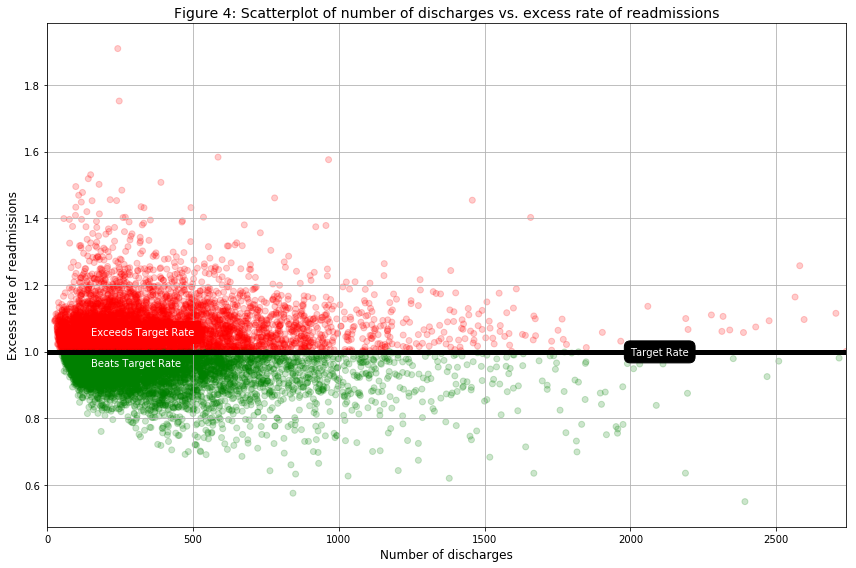

In [23]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = np.array(list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]))
col = np.where(y>1,'r','g')

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y, color=col, alpha=0.2)

plt.axhline(y=1, color='black', linewidth=5.0, label='Target')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 4: Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.text(150, 1.05, 'Exceeds Target Rate', color='white', bbox=dict(facecolor='red', edgecolor='red', pad=6.0))

ax.text(150, 0.955, 'Beats Target Rate', color='white', bbox=dict(facecolor='green', edgecolor='green', boxstyle='round'))

ax.text(2000, 0.99, 'Target Rate', color='white', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=.6'))


ax.grid(True)
fig.tight_layout()